# 非数值类型数据处理

### Get_dummies哑变量处理（类别数量不多时优先考虑此方法，容易产生高维数据，通常与PCA结合使用）

###### 示例1：“男”和“女”的数值转换

In [1]:
import pandas as pd
df = pd.DataFrame({'客户编号': [1, 2, 3], '性别': ['男', '女', '男']})
df

,客户编号,性别
0,1,男
1,2,女
2,3,男


In [2]:
df = pd.get_dummies(df, columns=['性别'])
df

,客户编号,性别_女,性别_男
0,1,0,1
1,2,1,0
2,3,0,1


In [3]:
df = df.drop(columns='性别_女') 
df

,客户编号,性别_男
0,1,1
1,2,0
2,3,1


In [4]:
df = df.rename(columns={'性别_男':'性别'})
df

,客户编号,性别
0,1,1
1,2,0
2,3,1


###### 示例2：房屋朝向的数值转换

In [5]:
import pandas as pd
df = pd.DataFrame({'房屋编号': [1, 2, 3, 4, 5], '朝向': ['东', '南', '西', '北', '南']})
df

,房屋编号,朝向
0,1,东
1,2,南
2,3,西
3,4,北
4,5,南


In [6]:
df = pd.get_dummies(df, columns=['朝向'])
df

,房屋编号,朝向_东,朝向_北,朝向_南,朝向_西
0,1,1,0,0,0
1,2,0,0,1,0
2,3,0,0,0,1
3,4,0,1,0,0
4,5,0,0,1,0


In [7]:
df = df.drop(columns='朝向_西') 
df

,房屋编号,朝向_东,朝向_北,朝向_南
0,1,1,0,0
1,2,0,0,1
2,3,0,0,0
3,4,0,1,0
4,5,0,0,1


### Label Encoding编号处理（随机编号；适用于树模型）

In [8]:
import pandas as pd
df = pd.DataFrame({'编号': [1, 2, 3, 4, 5],
                   '城市': ['北京', '上海', '广州', '深圳', '北京']})
df

,编号,城市
0,1,北京
1,2,上海
2,3,广州
3,4,深圳
4,5,北京


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['城市'])
label

array([1, 0, 2, 3, 1])

In [10]:
df['城市'] = label
df

,编号,城市
0,1,1
1,2,0
2,3,2
3,4,3
4,5,1


### pandas库中的replace()函数（指定编号）

In [11]:
df = pd.DataFrame({'编号': [1, 2, 3, 4, 5],
                   '城市': ['北京', '上海', '广州', '深圳', '北京']})
df['城市'].value_counts()

北京    2
上海    1
广州    1
深圳    1
Name: 城市, dtype: int64

In [12]:
df['城市'] = df['城市'].replace({'北京': 0, '上海': 1, '广州': 2, '深圳':3})
df

,编号,城市
0,1,0
1,2,1
2,3,2
3,4,3
4,5,0


# 重复值、缺失值及异常值处理

### 重复值处理

In [14]:
import pandas as pd
data = pd.DataFrame([[1, 2, 3], [1, 2, 3], [4, 5, 6]],
                    columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
0,1,2,3
1,1,2,3
2,4,5,6


In [17]:
data[data.duplicated()]

,c1,c2,c3
1,1,2,3


In [19]:
data.duplicated().sum()

1

In [20]:
data = data.drop_duplicates()
data

,c1,c2,c3
0,1,2,3
2,4,5,6


In [21]:
# 按列进行去重
data = pd.DataFrame([[1, 2, 3], [1, 2, 3], [4, 5, 6]], columns=['c1', 'c2', 'c3'])
data = data.drop_duplicates('c1')
data

,c1,c2,c3
0,1,2,3
2,4,5,6


### 缺失值处理

In [22]:
import numpy as np
data = pd.DataFrame([[1, np.nan, 3], [np.nan, 2, np.nan], [1, np.nan, 0]], columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
0,1.0,NaN,3.0
1,NaN,2.0,NaN
2,1.0,NaN,0.0


In [34]:
# 查看缺失情况
data.isnull()
# data.isna()

,c1,c2,c3
0,False,True,False
1,True,False,True
2,False,True,False


In [32]:
# 查看某列缺失情况
data['c1'].isnull()

0    False
1     True
2    False
Name: c1, dtype: bool

In [25]:
# 查看缺失列
data[data['c1'].isnull()]

,c1,c2,c3
1,NaN,2.0,NaN


In [31]:
# 只要该行有空值就删除该行
a = data.dropna()
a

,c1,c2,c3


In [30]:
# 如果该行的非空值少于n个则删除该行
a = data.dropna(thresh=2)
a

,c1,c2,c3
0,1.0,NaN,3.0
2,1.0,NaN,0.0


In [35]:
# 均值填充
b = data.fillna(data.mean())
b

,c1,c2,c3
0,1.0,2.0,3.0
1,1.0,2.0,1.5
2,1.0,2.0,0.0


In [36]:
# 中位数填充
b = data.fillna(data.median())
b

,c1,c2,c3
0,1.0,2.0,3.0
1,1.0,2.0,1.5
2,1.0,2.0,0.0


In [39]:
# 上方值填充，若上方值不存在或缺失，则不填充
c = data.fillna(method='pad')
c

,c1,c2,c3
0,1.0,NaN,3.0
1,1.0,2.0,3.0
2,1.0,2.0,0.0


In [40]:
# 下方值填充，若下方值不存在或缺失，则不填充
c = data.fillna(method='bfill')
c

,c1,c2,c3
0,1.0,2.0,3.0
1,1.0,2.0,0.0
2,1.0,NaN,0.0


### 异常值处理

In [41]:
data = pd.DataFrame({'c1': [3, 10, 5, 7, 1, 9, 69],
                     'c2': [15, 16, 14, 100, 19, 11, 8],
                     'c3': [20, 15, 18, 21, 120, 27, 29]},
                    columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
0,3,15,20
1,10,16,15
2,5,14,18
3,7,100,21
4,1,19,120
5,9,11,27
6,69,8,29


<AxesSubplot:>

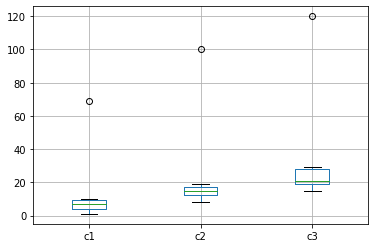

In [42]:
# 利用箱型图观察
data.boxplot() 

In [44]:
# 利用标准差检测
a = pd.DataFrame()
for i in data.columns:
    z = (data[i] - data[i].mean()) / data[i].std()
    a[i] = abs(z) > 2
a

,c1,c2,c3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,True
5,False,False,False
6,True,False,False


###### 处理异常值的方式

删除异常值所在行

将异常值看作缺失值

数据分箱

# 数据标准化

In [47]:
import pandas as pd
X = pd.DataFrame({'酒精含量(%)': [50, 60, 40, 80, 90],
                  '苹果酸含量(%)': [2, 1, 1, 3, 2]})
y = [0, 0, 0, 1, 1]
X 

,酒精含量(%),苹果酸含量(%)
0,50,2
1,60,1
2,40,1
3,80,3
4,90,2


### min-max标准化（离差标准化）

In [48]:
from sklearn.preprocessing import MinMaxScaler
X_new = MinMaxScaler().fit_transform(X)
print(X_new)

[[0.2 0.5]
 [0.4 0. ]
 [0.  0. ]
 [0.8 1. ]
 [1.  0.5]]


### Z-score标准化（均值归一化）

In [49]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
print(X_new)

[[-0.75482941  0.26726124]
 [-0.21566555 -1.06904497]
 [-1.29399328 -1.06904497]
 [ 0.86266219  1.60356745]
 [ 1.40182605  0.26726124]]


# 数据分箱

In [50]:
import pandas as pd
data = pd.DataFrame([[22,1],[25,1],[20,0],[35,0],[32,1],[38,0],[50,0],[46,1]], columns=['年龄', '是否违约'])
data

,年龄,是否违约
0,22,1
1,25,1
2,20,0
3,35,0
4,32,1
5,38,0
6,50,0
7,46,1


### 等宽数据分箱

In [51]:
data_cut = pd.cut(data['年龄'], 3)
print(data_cut)

0    (19.97, 30.0]
1    (19.97, 30.0]
2    (19.97, 30.0]
3     (30.0, 40.0]
4     (30.0, 40.0]
5     (30.0, 40.0]
6     (40.0, 50.0]
7     (40.0, 50.0]
Name: 年龄, dtype: category
Categories (3, interval[float64, right]): [(19.97, 30.0] < (30.0, 40.0] < (40.0, 50.0]]


In [52]:
data['年龄'].groupby(data_cut).count()

年龄
(19.97, 30.0]    3
(30.0, 40.0]     3
(40.0, 50.0]     2
Name: 年龄, dtype: int64

# 特征筛选：WOE值与IV值

IV值越高，特征变量就越具有区分度，一般取0.1-0.5之间的特征变量，大于0.5的特征变量要考虑其真实性

### 数据分箱

In [54]:
import pandas as pd
data = pd.DataFrame([[22,1],[25,1],[20,0],[35,0],[32,1],[38,0],[50,0],[46,1]], columns=['年龄', '是否违约'])
data

,年龄,是否违约
0,22,1
1,25,1
2,20,0
3,35,0
4,32,1
5,38,0
6,50,0
7,46,1


In [55]:
data_cut = pd.cut(data['年龄'], 3)
data_cut

0    (19.97, 30.0]
1    (19.97, 30.0]
2    (19.97, 30.0]
3     (30.0, 40.0]
4     (30.0, 40.0]
5     (30.0, 40.0]
6     (40.0, 50.0]
7     (40.0, 50.0]
Name: 年龄, dtype: category
Categories (3, interval[float64, right]): [(19.97, 30.0] < (30.0, 40.0] < (40.0, 50.0]]

### 统计各个分箱样本总数、坏样本数和好样本数

In [56]:
# 统计总客户数
cut_group_all = data['是否违约'].groupby(data_cut).count()
# 统计违约客户
cut_y = data['是否违约'].groupby(data_cut).sum()
# 统计未违约客户
cut_n = cut_group_all - cut_y

In [61]:
df = pd.DataFrame()
df['总数'] = cut_group_all
df['坏样本'] = cut_y
df['好样本'] = cut_n
df

,总数,坏样本,好样本
年龄,,,
"(19.97, 30.0]",3,2,1
"(30.0, 40.0]",3,1,2
"(40.0, 50.0]",2,1,1


### 统计各分箱中坏样本比率和好样本比率

In [62]:
df['坏样本%'] = df['坏样本'] / df['坏样本'].sum()
df['好样本%'] = df['好样本'] / df['好样本'].sum()
df

,总数,坏样本,好样本,坏样本%,好样本%
年龄,,,,,
"(19.97, 30.0]",3,2,1,0.50,0.25
"(30.0, 40.0]",3,1,2,0.25,0.50
"(40.0, 50.0]",2,1,1,0.25,0.25


### 计算WOE值

In [63]:
import numpy as np
df['WOE'] = np.log(df['坏样本%'] / df['好样本%'])
df

,总数,坏样本,好样本,坏样本%,好样本%,WOE
年龄,,,,,,
"(19.97, 30.0]",3,2,1,0.50,0.25,0.693147
"(30.0, 40.0]",3,1,2,0.25,0.50,-0.693147
"(40.0, 50.0]",2,1,1,0.25,0.25,0.000000


In [ ]:
# # 当WOE值无穷大时，IV值也会变为无穷大，此时将WOE值替换为0
# df = df.replace({'WOE': {np.inf: 0, -np.inf: 0}})

### 计算IV值

In [64]:
df['IV'] = df['WOE'] * (df['坏样本%'] - df['好样本%'])
df

,总数,坏样本,好样本,坏样本%,好样本%,WOE,IV
年龄,,,,,,,
"(19.97, 30.0]",3,2,1,0.50,0.25,0.693147,0.173287
"(30.0, 40.0]",3,1,2,0.25,0.50,-0.693147,0.173287
"(40.0, 50.0]",2,1,1,0.25,0.25,0.000000,0.000000


In [65]:
iv = df['IV'].sum()
print(iv)

0.34657359027997264


# 案例实战：客户流失预警模型的IV值计算

In [66]:
import pandas as pd
import numpy as np

def cal_iv(data, cut_num, feature, target):
    # 1.数据分箱
    data_cut = pd.cut(data[feature], cut_num)

    # 2.统计各个分箱样本总数、坏样本数和好样本数
    cut_group_all = data[target].groupby(data_cut).count()  # 总客户数
    cut_y = data[target].groupby(data_cut).sum()  # 坏样本数
    cut_n = cut_group_all - cut_y  # 好样本数
    # 汇总基础数据
    df = pd.DataFrame()  # 创建一个空DataFrame用来汇总数据
    df['总数'] = cut_group_all
    df['坏样本'] = cut_y
    df['好样本'] = cut_n

    # 3.统计坏样本%和好样本%
    df['坏样本%'] = df['坏样本'] / df['坏样本'].sum()
    df['好样本%'] = df['好样本'] / df['好样本'].sum()

    # 4.计算WOE值
    df['WOE'] = np.log(df['坏样本%'] / df['好样本%'])
    df = df.replace({'WOE': {np.inf: 0, -np.inf: 0}}) 

    # 5.计算各个分箱的IV值
    df['IV'] = df['WOE'] * (df['坏样本%'] - df['好样本%'])

    # 6.汇总各个分箱的IV值，获得特征变量的IV值
    iv = df['IV'].sum()
    
    print(iv)

In [67]:
data = pd.read_excel('股票客户流失.xlsx')
data.head()

,账户资金（元）,最后一次交易距今时间（天）,上月交易佣金（元）,本券商使用时长（年）,是否流失
0,22686.5,297,149.25,0,0
1,190055.0,42,284.75,2,0
2,29733.5,233,269.25,0,1
3,185667.5,44,211.50,3,0
4,33648.5,213,353.50,0,1


In [69]:
for i in data.columns[:-1]:
    print(i + '的IV值为：')
    cal_iv(data, 4, i, '是否流失')  # 调用函数

账户资金（元）的IV值为：
0.15205722409339645
最后一次交易距今时间（天）的IV值为：
0.2508468300174099
上月交易佣金（元）的IV值为：
0.30811632146662304
本券商使用时长（年）的IV值为：
0.6144219248359752


# 多重共线性的分析与处理

### 多重共线性的不利影响

线性回归估计式变得不确定或不精确

线性回归估计式方差变得很大，标准误差增大

估计的回归系数符号相反，与预期不一致，产生错误结论

削弱特征变量的特征重要性

### 多重共线性的分析与检验

In [70]:
import pandas as pd
df = pd.read_excel('数据.xlsx')
df.head()

,X1,X2,X3,Y
0,8,16,-32,77
1,7,14,-31,52
2,4,9,-12,42
3,1,2,5,6
4,1,2,8,19


In [71]:
X = df.drop(columns='Y')
Y = df['Y']

###### 相关系数判断（皮尔逊相关系数）

简单相关系数只是多重共线性的充分条件

存在多个特征变量时，相关系数较小的特征变量间也可能存在较严重的多重共线性

In [72]:
X.corr()

,X1,X2,X3
X1,1.000000,0.992956,-0.422788
X2,0.992956,1.000000,-0.410412
X3,-0.422788,-0.410412,1.000000


###### 方差膨胀因子法（VIF检验）

小于10不存在多重共线性

10-100较强多重共线性

大于100存在严重多重共线性

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, X.columns.get_loc(i)) for i in X.columns]
vif

[259.6430487184967, 257.6315718292196, 1.302330632715429]

In [75]:
vif = []
for i in X.columns: 
    vif.append(variance_inflation_factor(X.values, X.columns.get_loc(i)))
vif

[259.6430487184967, 257.6315718292196, 1.302330632715429]

In [82]:
X = df[['X1', 'X3']]
Y = df['Y']

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, X.columns.get_loc(i)) for i in X.columns]
vif

[1.289349054516766, 1.289349054516766]

# 过采样和欠采样

### 过采样（样本量不大时）

In [84]:
import pandas as pd
data = pd.read_excel("信用卡数据.xlsx")
data.head()

,编号,年龄,负债比率,月收入,贷款数量,家属人数,分类
0,1,29,0.22,7800,1,3,0
1,2,52,0.46,4650,1,0,0
2,3,28,0.10,3000,0,0,0
3,4,29,0.20,5916,0,0,0
4,5,27,1.28,1300,0,0,1


In [85]:
X = data.drop(columns='分类')
y = data['分类']

In [86]:
from collections import Counter
Counter(y)

Counter({0: 1000, 1: 100})

###### 随机过采样

In [88]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

In [90]:
Counter(y_oversampled)

Counter({0: 1000, 1: 1000})

In [92]:
X_oversampled.shape

(2000, 6)

###### SMOTE过采样

In [93]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_smotesampled, y_smotesampled = smote.fit_resample(X, y)

In [94]:
Counter(y_smotesampled)

Counter({0: 1000, 1: 1000})

### 欠采样

In [95]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

In [96]:
Counter(y_undersampled)

Counter({0: 100, 1: 100})

In [97]:
X_undersampled.shape

(200, 6)